<a href="https://colab.research.google.com/github/Variyata5/Linear_Regression/blob/main/Multiple_Regression_model_for_Bike_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP- 1 -> Reading and understanding the data.

In [ ]:
#IMPORTING NECESSARY LIBRARIES FOR BASIC ANALYSIS-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To look at the whole data at one glance-
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
# Reading the given data with pandas.
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#summary of all the numeric columns given bt describe method as below-
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#Determining the number of rows and columns in the given dataset for bike info.
bike.shape

(730, 16)

In [ ]:
# Looking into the datatypes and number of values each column have.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Insights below-
1. 730 rows and 16 columns.
2. Few of the variables are categorical and few are numerical type.
3. Alot of values like 0,1,2,3 that signifies some different values at those places in columns.


In [ ]:
#Now checking for any null values present in our dataset.
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## As seen above there is no null value in any column.

In [ ]:
#Lets see what all column names are.
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [ ]:
#As seen above there are few columns which are abbreviated so we need to rename those as below.
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [ ]:
#Looking again for column names if updated or not.
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Checking info.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   Season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   Month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   Weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  Humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Now columns are more kind of readable.
### ------------------------------------------------------

# STEP-2 -> Visualising the Data.

In [ ]:
#Now we are mapping values as given in data-dictionary for season

bike['Season']=bike.Season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Now we are mapping values as given in data-dictionary for Month

bike['Month']=bike.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Now we are mapping values as given in data-dictionary for Weather

bike['Weather']=bike.Weather.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Now we are mapping values as given in data-dictionary for weekday

bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Importing neccesary libraries for visualization as below-
import matplotlib.pyplot as plt
import seaborn as sns

## Now lets try to figure out what are the Continuous and Categorical features present in our dataset.



In [ ]:
#By this we can identify how many unique valres are tere in each column.
bike.nunique().sort_values()


Year            2
holiday         2
workingday      2
Weather         3
Season          4
weekday         7
Month          12
temp          498
Humidity      594
casual        605
windspeed     649
registered    678
atemp         689
Count         695
instant       730
dteday        730
dtype: int64

## Visualising Numeric Variables


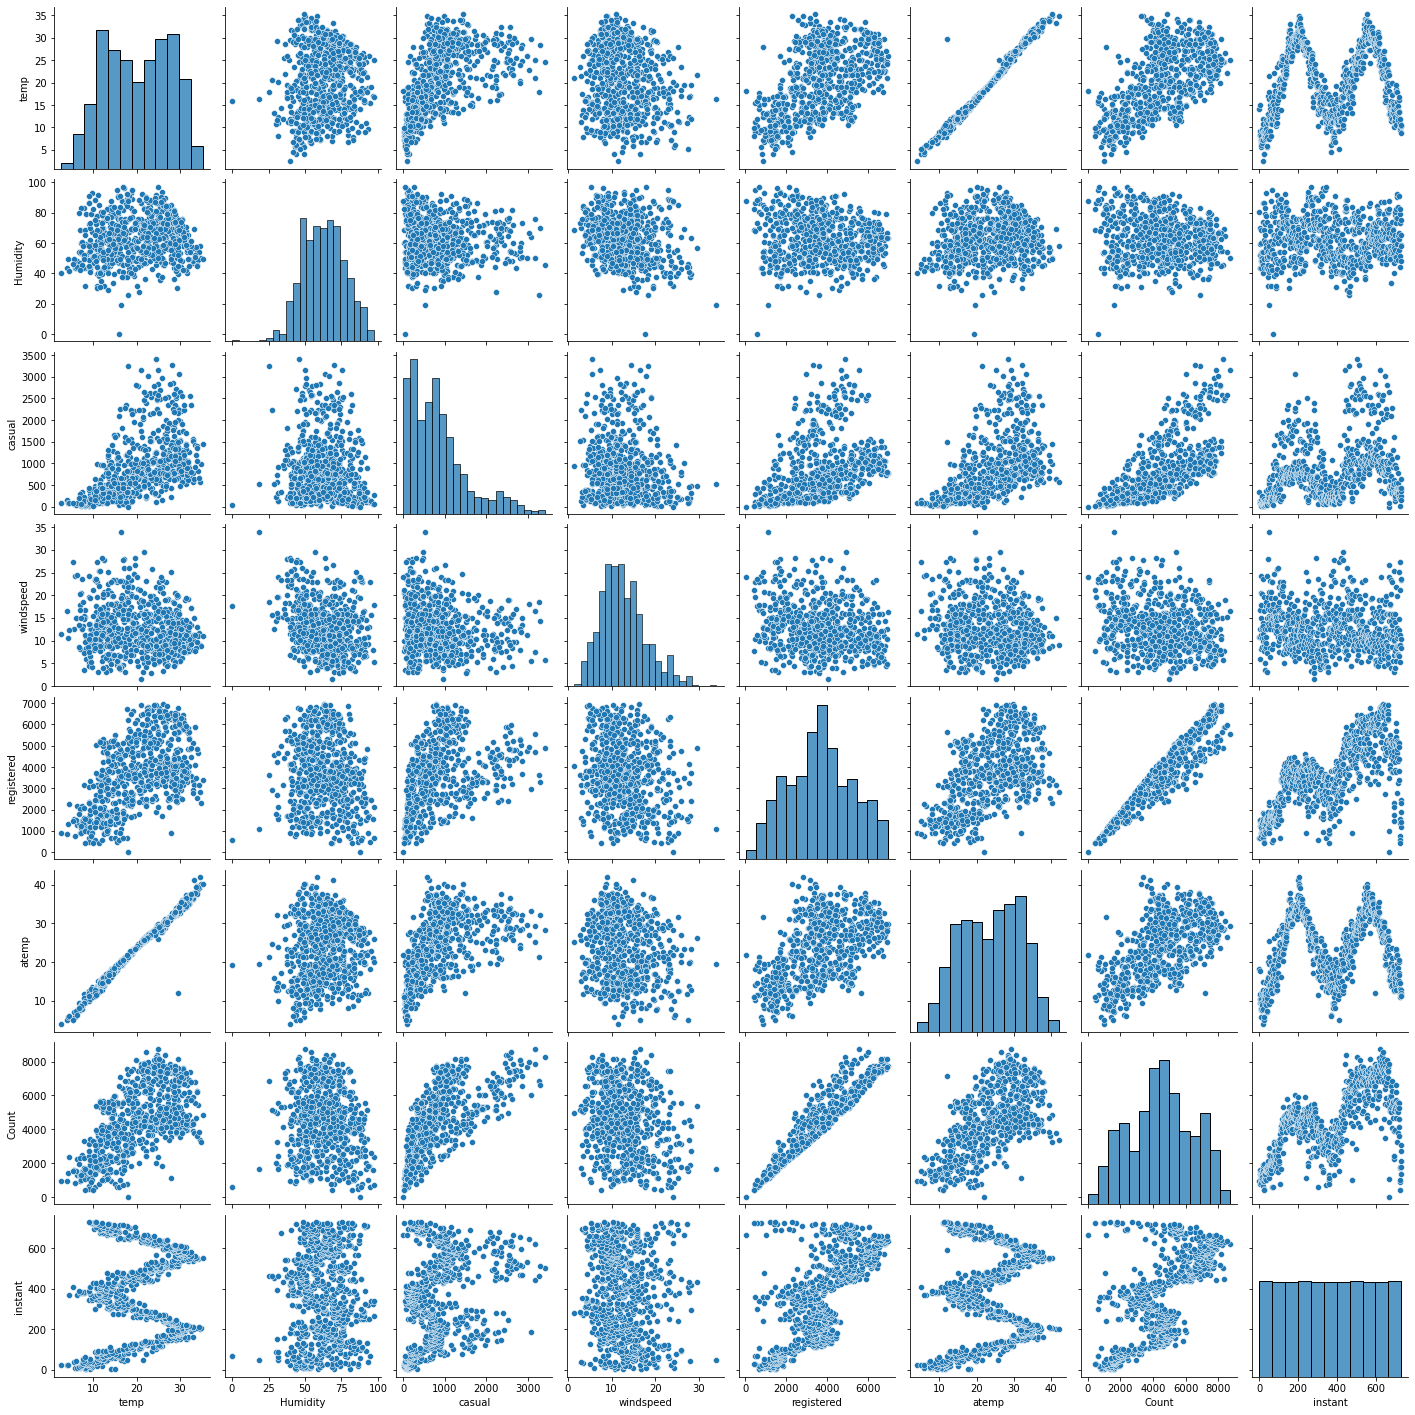

In [ ]:
#Lets make pairplot for all the numeric variables
sns.pairplot(bike, vars=["temp", "Humidity",'casual','windspeed','registered','atemp','Count','instant'])
plt.show()

-Alot of variables are coorelated with tempreature.

-As seen above we can say that, bike rentals are more correlated to temperature

## Visualising Categorical Variables


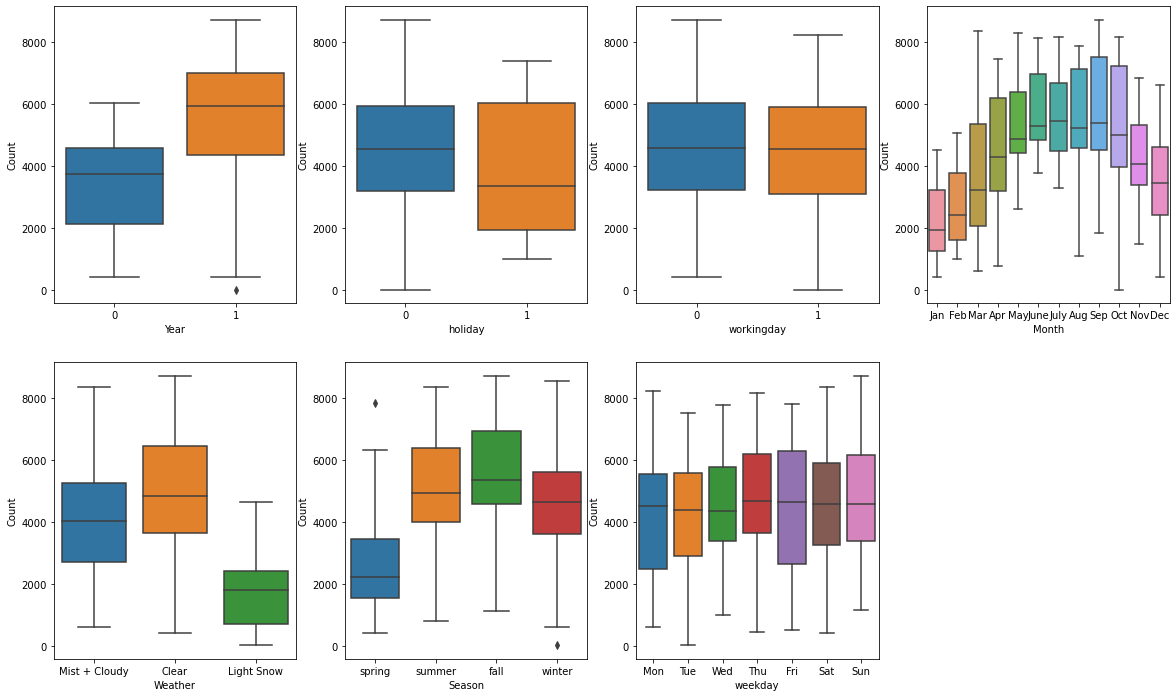

In [ ]:
##Now look at relationship between categorical and continuous variable as below-

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'Count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'Count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'Count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'Month', y = 'Count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'Weather', y = 'Count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'Season', y = 'Count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'Count', data = bike)
#plotting the above variables
plt.show()


### Insights-
- Bike rentals are more in year 2019 as compared to 2018.
- Bike rentals are high in partly cloudy wheather.
- Same are high in Fall season as compared to summer.
- High on days like- Saturday, Wednesday, Thursday.

## Now lets do the Exploratory Data Analysis.


## A- YEAR
year (0: 2018, 1:2019)


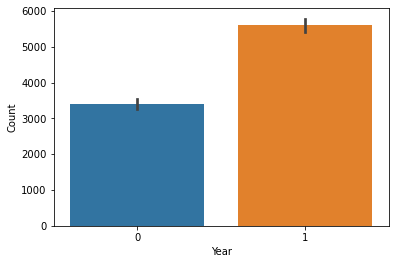

In [ ]:
#Relation between Year and count of bike rentals
sns.barplot('Year','Count',data=bike)
plt.show()

## As seen above Bike rentals are more in the year 2019(stated 1) compared to 2018(stated 0).


## B- SEASON


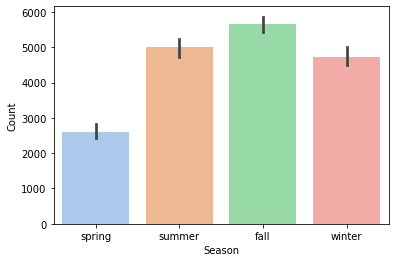

In [ ]:
#Relation between season and count of bike rentals

sns.barplot('Season','Count',data=bike,palette="pastel",)
plt.show()

## As we can observe, Bike Rentals are more during the Fall season and then in summer, winter and spring.


## C- WHEATHER

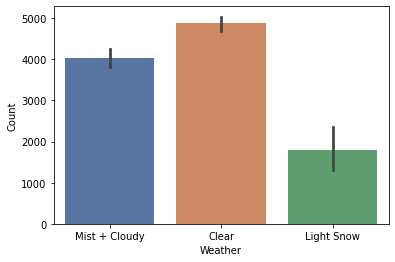

In [ ]:
#Relation between weather and count of bike rentals
sns.barplot('Weather','Count',palette="deep",data=bike)
plt.show()


## As observed above, Bike Rentals are high in clear weather.


## D- MONTH

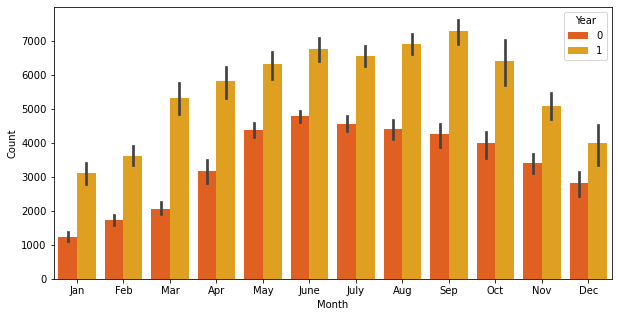

In [ ]:
#Relation between month and
plt.figure(figsize=(10,5))
sns.barplot('Month','Count',hue='Year',data=bike,palette='autumn')
plt.show()

### High bike rentals in Sept 2019.

## E- HUMIDITY

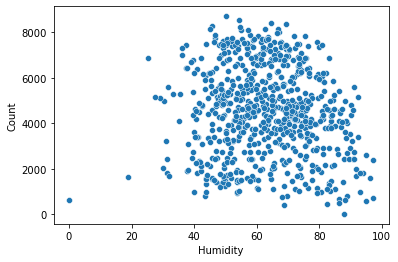

In [ ]:
sns.scatterplot(x='Humidity', y='Count',data=bike)
plt.show()

### Bike rentals more at high humidity ranges between 40 to 80.

## F- TEMPERATURE

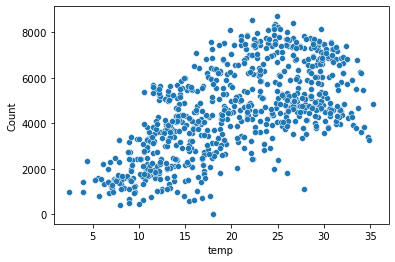

In [ ]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='Count' ,data=bike)
plt.show()

### As observed above, Bike Rentals are observed at higher temperatures.


## Heatmap

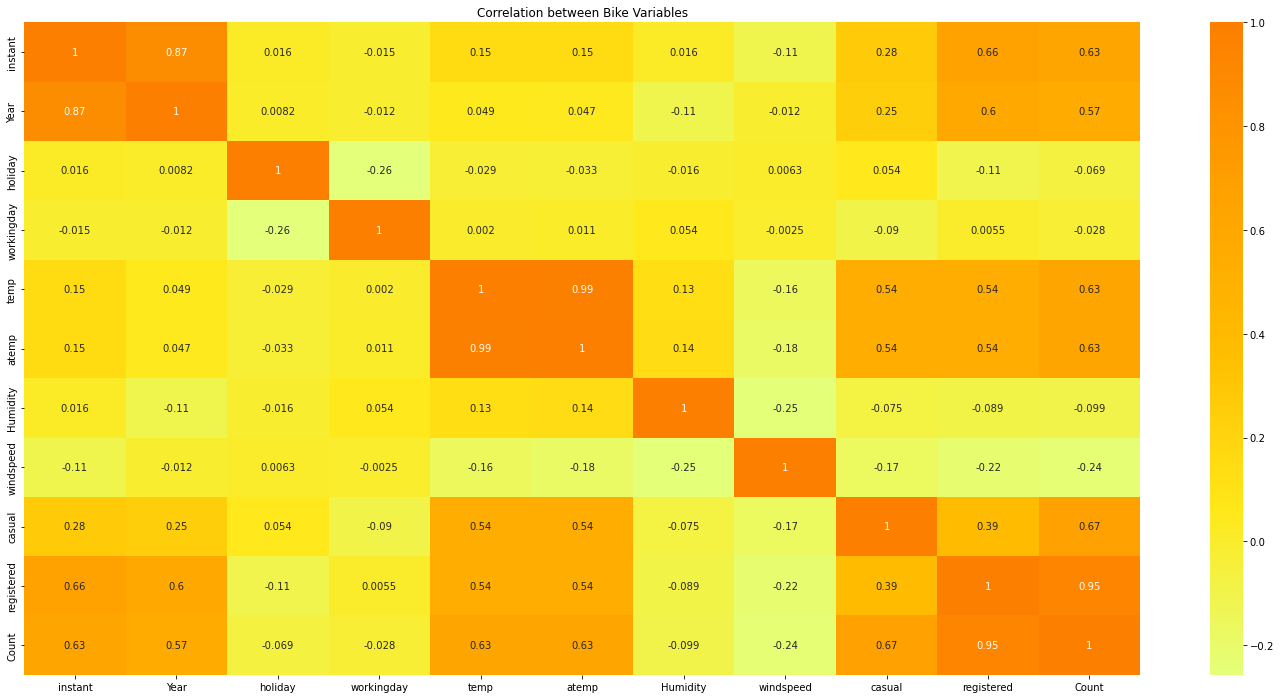

In [ ]:
#Lets look at the Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='Wistia', annot = True)
plt.title("Correlation between Bike Variables")
plt.show()

### Insights-
As our Target variable is 'count' variable wo we need to look at the whole coorelation according to it.

Its easily visible that temp, atemp, casual,registered,instant variables are correlated to 'count' variable

Once we look at this coorelation lets build model and we can consider this coorelation as we need.

### It is seen thazt the dataset has some variables that are not required.
We can drop instant, dteday, casual, registered as below-



In [ ]:
#dropping out unnecessary columns as below-

bike=bike.drop(['instant','dteday','casual', 'registered'], axis=1)
bike.head()


,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#Checking for bike info-
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step- 3-> Data Preparation

## Lets create dummy variables


In [ ]:
# creating a list and putting all category columns in to it and converting them to category data type.

cat = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather']

for i in cat:
    bike[i] = bike[i].astype('category')

In [ ]:
# Looking if variables converted into category -
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   Month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [ ]:
# Creating dummies for all the categories-

dummy = pd.get_dummies(bike[cat], drop_first=True)
dummy.head()

,Season_spring,Season_summer,Season_winter,Year_1,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,Weather_Light Snow,Weather_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Season_spring          730 non-null    uint8
 1   Season_summer          730 non-null    uint8
 2   Season_winter          730 non-null    uint8
 3   Year_1                 730 non-null    uint8
 4   Month_Aug              730 non-null    uint8
 5   Month_Dec              730 non-null    uint8
 6   Month_Feb              730 non-null    uint8
 7   Month_Jan              730 non-null    uint8
 8   Month_July             730 non-null    uint8
 9   Month_June             730 non-null    uint8
 10  Month_Mar              730 non-null    uint8
 11  Month_May              730 non-null    uint8
 12  Month_Nov              730 non-null    uint8
 13  Month_Oct              730 non-null    uint8
 14  Month_Sep              730 non-null    uint8
 15  holiday_1              730 non-null    u

In [ ]:
#we need to rename the variables as below-
dummy.rename({'Year_1':'Year_2019','holiday_1':'holiday_Yes','workingday_1':'workingday_Yes'},axis=1,inplace=True)

In [ ]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Season_spring          730 non-null    uint8
 1   Season_summer          730 non-null    uint8
 2   Season_winter          730 non-null    uint8
 3   Year_2019              730 non-null    uint8
 4   Month_Aug              730 non-null    uint8
 5   Month_Dec              730 non-null    uint8
 6   Month_Feb              730 non-null    uint8
 7   Month_Jan              730 non-null    uint8
 8   Month_July             730 non-null    uint8
 9   Month_June             730 non-null    uint8
 10  Month_Mar              730 non-null    uint8
 11  Month_May              730 non-null    uint8
 12  Month_Nov              730 non-null    uint8
 13  Month_Oct              730 non-null    uint8
 14  Month_Sep              730 non-null    uint8
 15  holiday_Yes            730 non-null    u

In [ ]:
# Concatenating both dummy and bike variables-
bike_new = pd.concat([bike,dummy], axis=1)
bike_new.head()


,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Looking for info-
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Season                 730 non-null    category
 1   Year                   730 non-null    category
 2   Month                  730 non-null    category
 3   holiday                730 non-null    category
 4   weekday                730 non-null    category
 5   workingday             730 non-null    category
 6   Weather                730 non-null    category
 7   temp                   730 non-null    float64 
 8   atemp                  730 non-null    float64 
 9   Humidity               730 non-null    float64 
 10  windspeed              730 non-null    float64 
 11  Count                  730 non-null    int64   
 12  Season_spring          730 non-null    uint8   
 13  Season_summer          730 non-null    uint8   
 14  Season_winter          730 non-null    uin

In [ ]:
#Dropping original category vaiables.
bike_new.drop(cat, axis=1, inplace = True)

In [ ]:
#Looking for head
bike_new.head()


,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Looking for info-
bike_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   Humidity               730 non-null    float64
 3   windspeed              730 non-null    float64
 4   Count                  730 non-null    int64  
 5   Season_spring          730 non-null    uint8  
 6   Season_summer          730 non-null    uint8  
 7   Season_winter          730 non-null    uint8  
 8   Year_2019              730 non-null    uint8  
 9   Month_Aug              730 non-null    uint8  
 10  Month_Dec              730 non-null    uint8  
 11  Month_Feb              730 non-null    uint8  
 12  Month_Jan              730 non-null    uint8  
 13  Month_July             730 non-null    uint8  
 14  Month_June             730 non-null    uint8  
 15  Month_

We can start working on model building-

# Step- 4-> Splitting the Data into Training and Testing Sets
## Train - Test Split


In [ ]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [ ]:
# splitting the date into two train and test dataframes

df_train_bike_new, df_test_bike_new = train_test_split(bike_new, train_size=0.70, random_state=100)

In [ ]:
# verify the columns and rows

print(df_train_bike_new.shape)
print(df_test_bike_new.shape)

(510, 30)
(220, 30)


## Performing rescaling the features
-using MinMax Scaler for this model

In [ ]:
# importing MinMax scaler from preprocessing module of sklearn library

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# defining a variable scaler for minmax scaling

scaler = MinMaxScaler()

In [ ]:
#Looking at the columns of bike.
bike_new.columns


Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_Yes', 'Weather_Light Snow', 'Weather_Mist + Cloudy'], dtype='object')

In [ ]:
# now doing scaling on all the numericals variables of train dataset and leaving Count variable as our count variable is target variable.

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

df_train_bike_new[num_vars] = scaler.fit_transform(df_train_bike_new[num_vars])
df_train_bike_new[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [ ]:
# checking all columns and all the variables after scaling.
df_train_bike_new.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.025490,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.345098
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Now before start the training process we will plot a heat map to check if there is multicollinearity



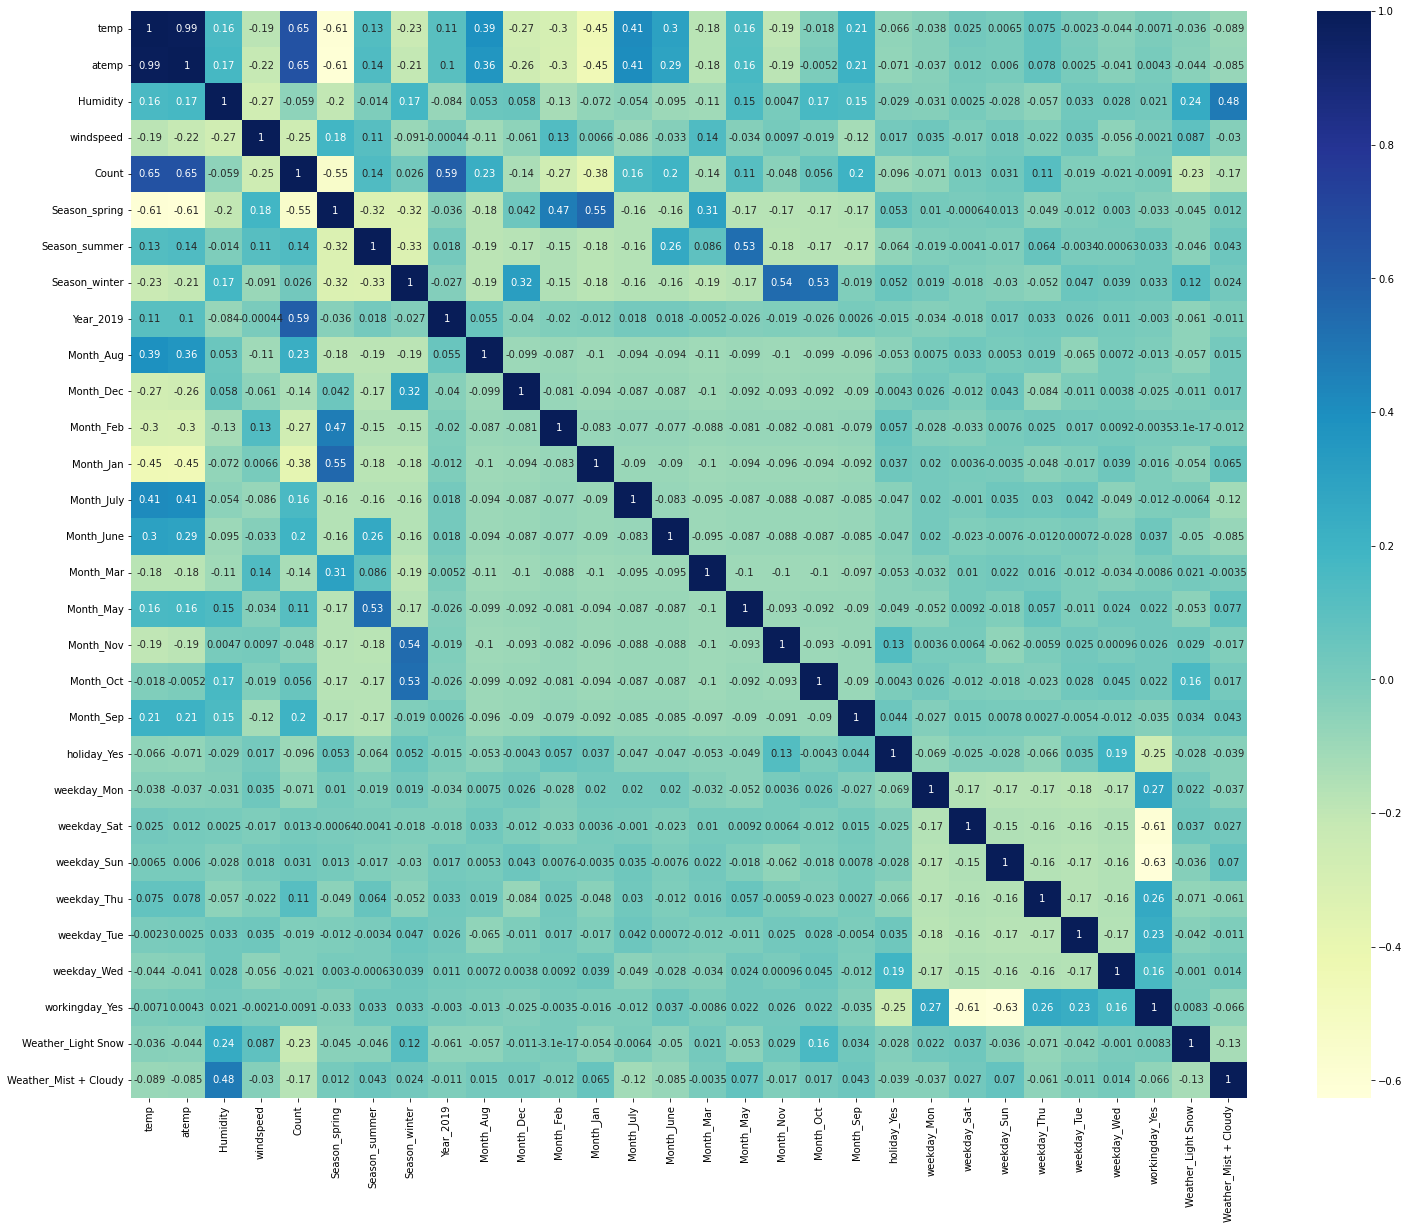

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike_new.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

## INSIGHT: -

Here we can see coorelation between variables of bike dataset. Few of them are highly corelated.

# Step- 5-> Model Building


In [ ]:
# Dividing training set into X_train and y_train sets for the model building

y_train = df_train_bike_new.pop('Count')
X_train = df_train_bike_new

print(y_train.shape)
print(X_train.shape)


(510,)
(510, 29)


In [ ]:
#here first we are doing RFE for feature selection then will work manually.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 10),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 12),
 ('Month_Mar', False, 15),
 ('Month_May', False, 9),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 13),
 ('Month_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('workingday_Yes', False, 4),
 ('Weather_Light Snow', True, 1),
 ('Weather_Mist + Cloudy', True, 1)]

In [ ]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019', 'Month_Dec', 'Month_Jan', 'Month_July', 'Month_Nov', 'Month_Sep', 'holiday_Yes', 'Weather_Light Snow', 'Weather_Mist + Cloudy'], dtype='object')

In [ ]:
# feature which are chosen by RFE during feature selection( so un-supported columns)

X_train.columns[~rfe.support_]

Index(['atemp', 'Month_Aug', 'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_Yes'], dtype='object')

In [ ]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()


,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Year_2019,Month_Dec,Month_Jan,Month_July,Month_Nov,Month_Sep,holiday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,1


## Model 1


In [ ]:
# we need to add constant here.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        22:10:15   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3197      0.036      8.859      0.000       0.249       0.391
temp                      0.4815      0.037     13.005      0.000       0.409       0.554
Humidity                 -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Season_spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
Season_summer             0.0423      0.015      2.761      0.006       0.012       0.072
Season_winter             0.1019      0.018      5.656      0.000       0.067       0.137
Year_2019                 0.2304      0.008     28.487      0.000       0.215       0.246
Month_Dec                -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Month_Jan                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Month_July               -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Month_Nov                -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Month_Sep                 0.0755      0.017      4.466      0.000       0.042       0.109
holiday_Yes              -0.0911      0.026     -3.557      0.000      -0.141      -0.041
Weather_Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Weather_Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,30.89
0,temp,17.79
2,windspeed,4.72
3,Season_spring,4.37
5,Season_winter,4.06
4,Season_summer,2.82
14,Weather_Mist + Cloudy,2.32
6,Year_2019,2.09
10,Month_Nov,1.85
8,Month_Jan,1.75


## Model 2
removing feature - Humidity due very high VIF values as all the p-values < 0.05.

In [ ]:
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        22:10:16   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2450      0.032      7.618      0.000       0.182       0.308
temp                      0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Season_spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
Season_summer             0.0349      0.015      2.251      0.025       0.004       0.065
Season_winter             0.0869      0.018      4.831      0.000       0.052       0.122
Year_2019                 0.2345      0.008     28.687      0.000       0.218       0.251
Month_Dec                -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Month_Jan                -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Month_July               -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Month_Nov                -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Month_Sep                 0.0687      0.017      4.015      0.000       0.035       0.102
holiday_Yes              -0.0918      0.026     -3.522      0.000      -0.143      -0.041
Weather_Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Weather_Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.
vif = pd.DataFrame()

vif['Features'] = X_train_rfe2.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,4.67
4,Season_winter,2.95
2,Season_spring,2.89
3,Season_summer,2.24
5,Year_2019,2.07
9,Month_Nov,1.81
7,Month_Jan,1.66
8,Month_July,1.59
13,Weather_Mist + Cloudy,1.57


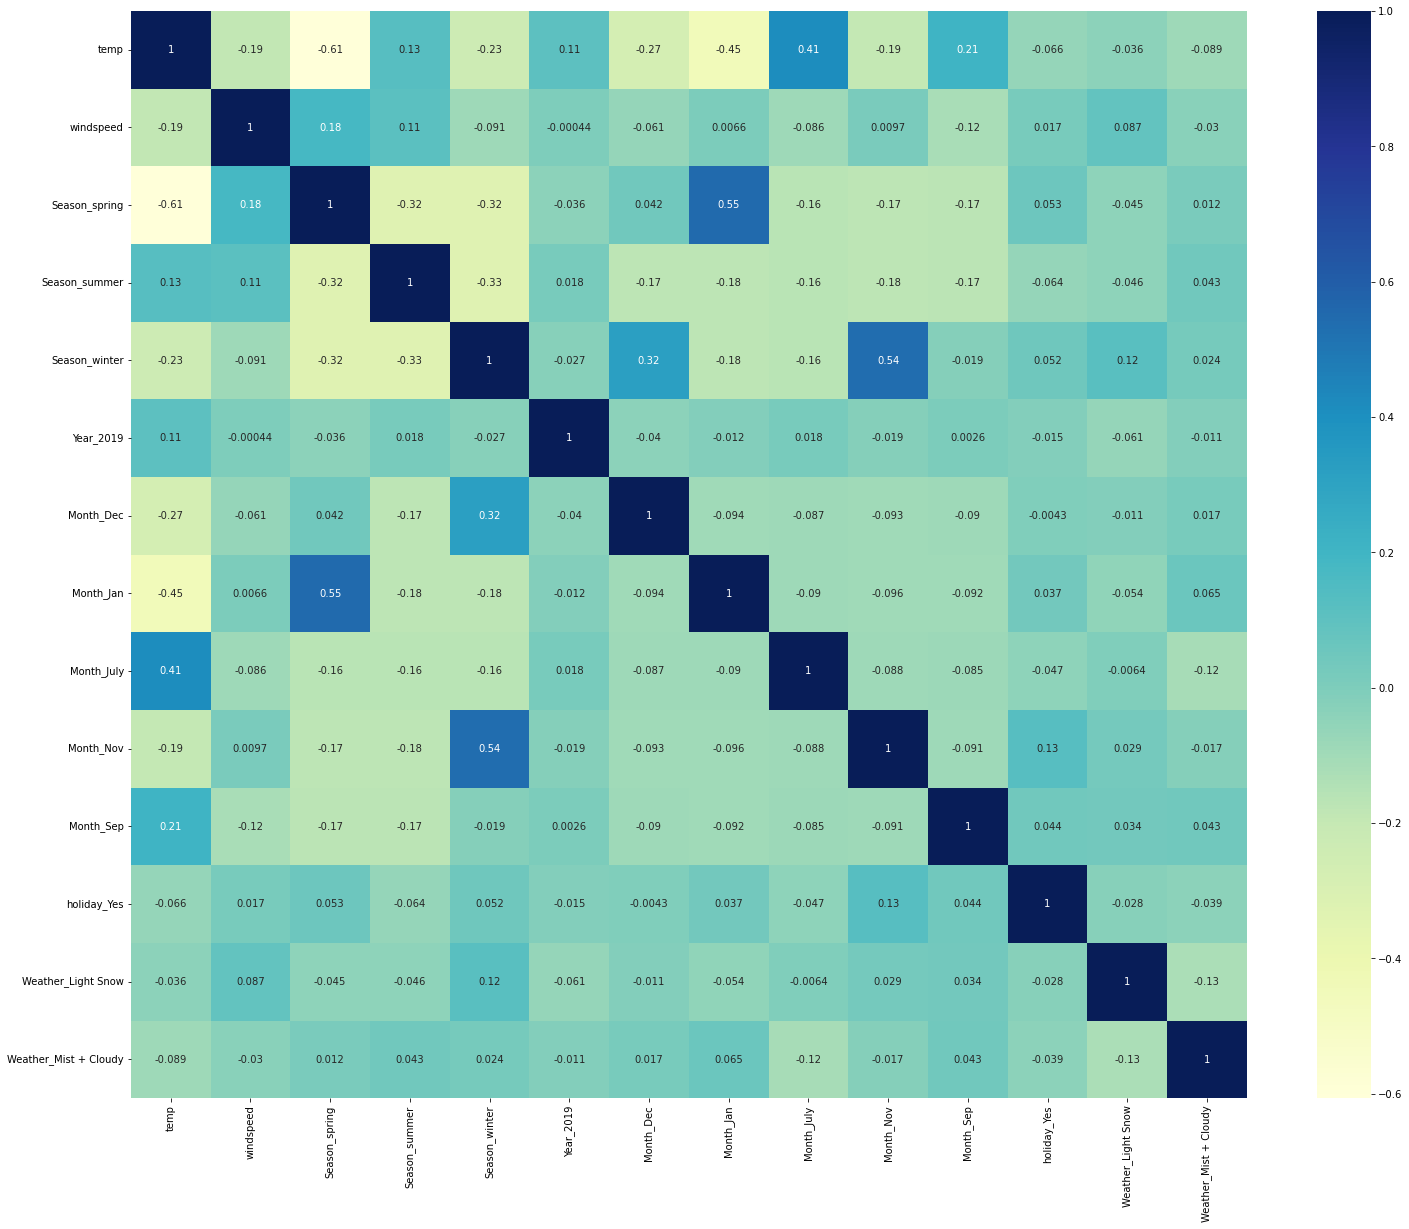

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(X_train_rfe2.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

## Model-3
### here we can see that month_jan is highly colliner with season_spring hence dropping month jan.


In [ ]:
X_train_rfe3 = X_train_rfe2.drop('Month_Jan', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.29e-185
Time:                        22:10:16   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2183      0.031      7.082      0.000       0.158       0.279
temp                      0.4698      0.035     13.561      0.000       0.402       0.538
windspeed                -0.1486      0.025     -5.908      0.000      -0.198      -0.099
Season_spring            -0.0761      0.022     -3.529      0.000      -0.118      -0.034
Season_summer             0.0406      0.015      2.630      0.009       0.010       0.071
Season_winter             0.0921      0.018      5.121      0.000       0.057       0.127
Year_2019                 0.2336      0.008     28.418      0.000       0.217       0.250
Month_Dec                -0.0308      0.017     -1.782      0.075      -0.065       0.003
Month_July               -0.0523      0.019     -2.808      0.005      -0.089      -0.016
Month_Nov                -0.0328      0.019     -1.718      0.086      -0.070       0.005
Month_Sep                 0.0709      0.017      4.123      0.000       0.037       0.105
holiday_Yes              -0.0932      0.026     -3.556      0.000      -0.145      -0.042
Weather_Light Snow       -0.2888      0.025    -11.656      0.000      -0.337      -0.240
Weather_Mist + Cloudy    -0.0810      0.009     -9.255      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       66.012   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.015
Skew:                          -0.672   Prob(JB):                     1.09e-35
Kurtosis:                       5.402   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,4.65
4,Season_winter,2.91
3,Season_summer,2.23
2,Season_spring,2.13
5,Year_2019,2.07
8,Month_Nov,1.81
7,Month_July,1.59
12,Weather_Mist + Cloudy,1.55
6,Month_Dec,1.42


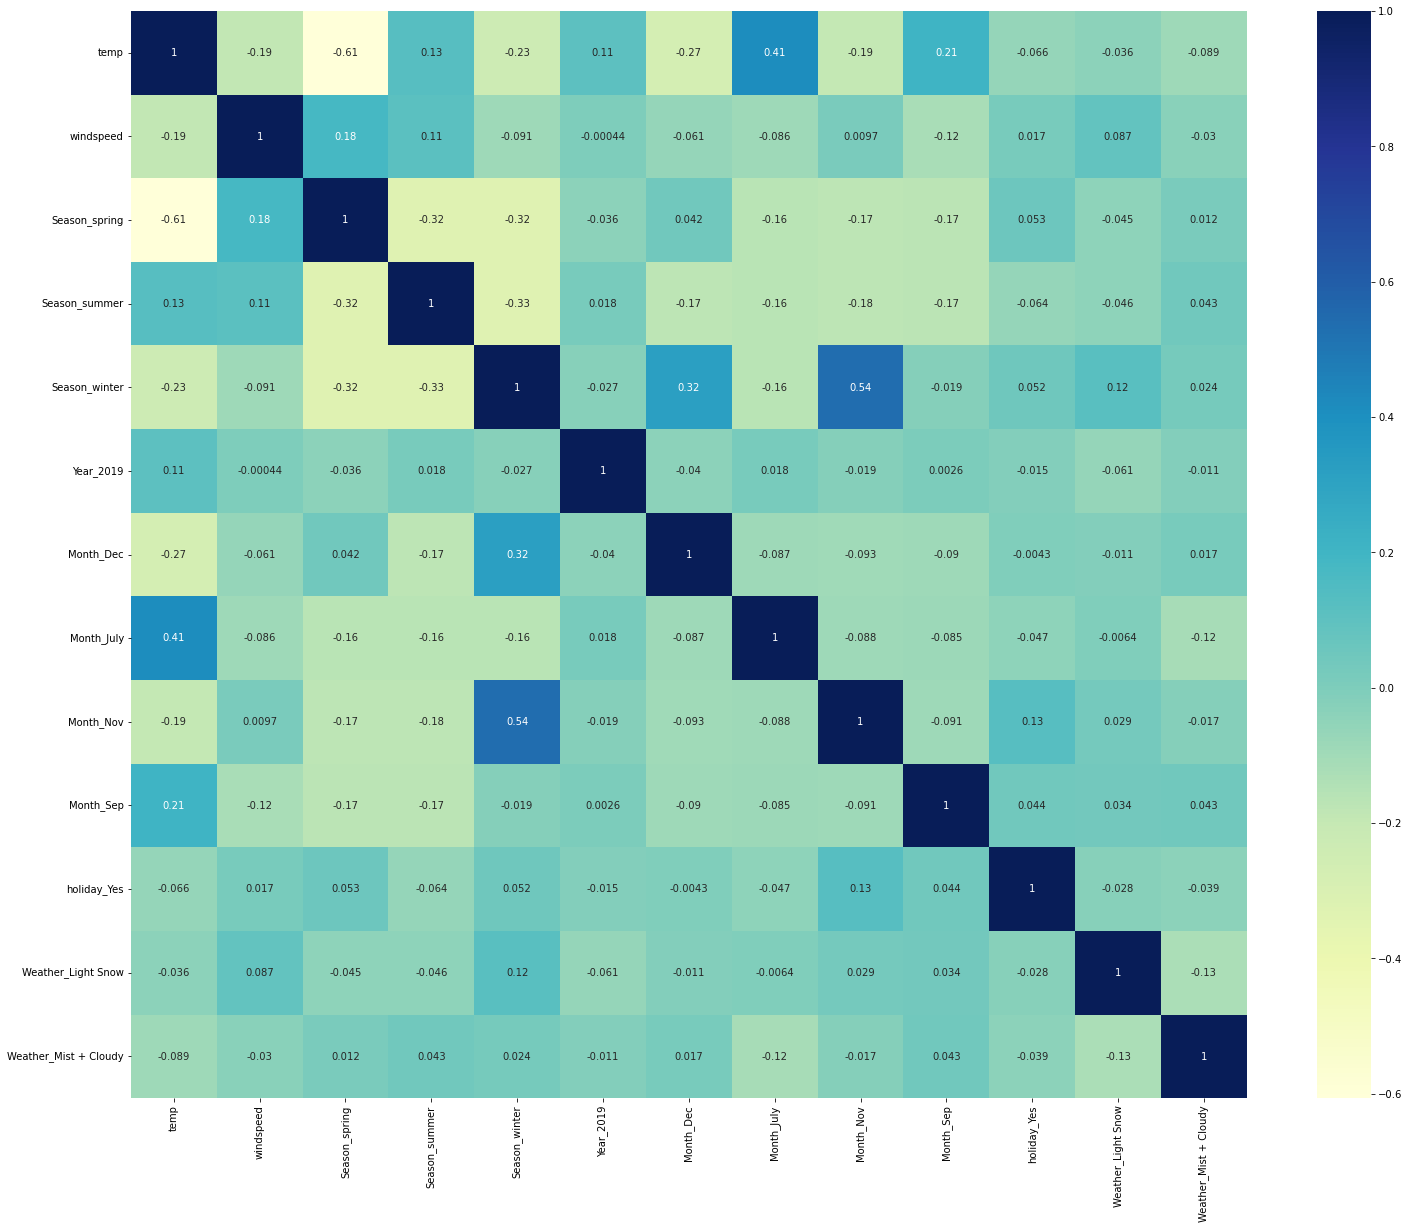

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(X_train_rfe3.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

## Model-4
### month_nov having p value = 0.086, which is greater than 0.05 so dropping month_nov.


In [ ]:
X_train_rfe4 = X_train_rfe3.drop('Month_Nov', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          3.75e-186
Time:                        22:10:17   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     497   BIC:                            -918.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2064      0.030      6.858      0.000       0.147       0.265
temp                      0.4837      0.034     14.323      0.000       0.417       0.550
windspeed                -0.1501      0.025     -5.962      0.000      -0.200      -0.101
Season_spring            -0.0689      0.021     -3.250      0.001      -0.111      -0.027
Season_summer             0.0448      0.015      2.929      0.004       0.015       0.075
Season_winter             0.0837      0.017      4.826      0.000       0.050       0.118
Year_2019                 0.2335      0.008     28.353      0.000       0.217       0.250
Month_Dec                -0.0195      0.016     -1.219      0.223      -0.051       0.012
Month_July               -0.0519      0.019     -2.785      0.006      -0.089      -0.015
Month_Sep                 0.0754      0.017      4.422      0.000       0.042       0.109
holiday_Yes              -0.0985      0.026     -3.777      0.000      -0.150      -0.047
Weather_Light Snow       -0.2857      0.025    -11.539      0.000      -0.334      -0.237
Weather_Mist + Cloudy    -0.0803      0.009     -9.165      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       61.256   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.385
Skew:                          -0.644   Prob(JB):                     1.99e-31
Kurtosis:                       5.235   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['Features'] = X_train_rfe4.columns
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.10
1,windspeed,4.60
3,Season_summer,2.23
2,Season_spring,2.13
5,Year_2019,2.07
4,Season_winter,2.03
7,Month_July,1.58
11,Weather_Mist + Cloudy,1.55
8,Month_Sep,1.34
6,Month_Dec,1.26


## Model-5
### month_dec having p value = 0.223, which is greater than 0.05 so dropping month_dec.


In [ ]:
X_train_rfe5 = X_train_rfe4.drop('Month_Dec', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          5.06e-187
Time:                        22:10:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1994      0.030      6.746      0.000       0.141       0.258
temp                      0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                -0.1479      0.025     -5.887      0.000      -0.197      -0.099
Season_spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
Season_summer             0.0465      0.015      3.051      0.002       0.017       0.076
Season_winter             0.0817      0.017      4.730      0.000       0.048       0.116
Year_2019                 0.2336      0.008     28.352      0.000       0.217       0.250
Month_July               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Month_Sep                 0.0768      0.017      4.517      0.000       0.043       0.110
holiday_Yes              -0.0975      0.026     -3.736      0.000      -0.149      -0.046
Weather_Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Weather_Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.09
1,windspeed,4.60
3,Season_summer,2.23
2,Season_spring,2.08
5,Year_2019,2.07
4,Season_winter,1.78
6,Month_July,1.58
10,Weather_Mist + Cloudy,1.55
7,Month_Sep,1.34
9,Weather_Light Snow,1.08


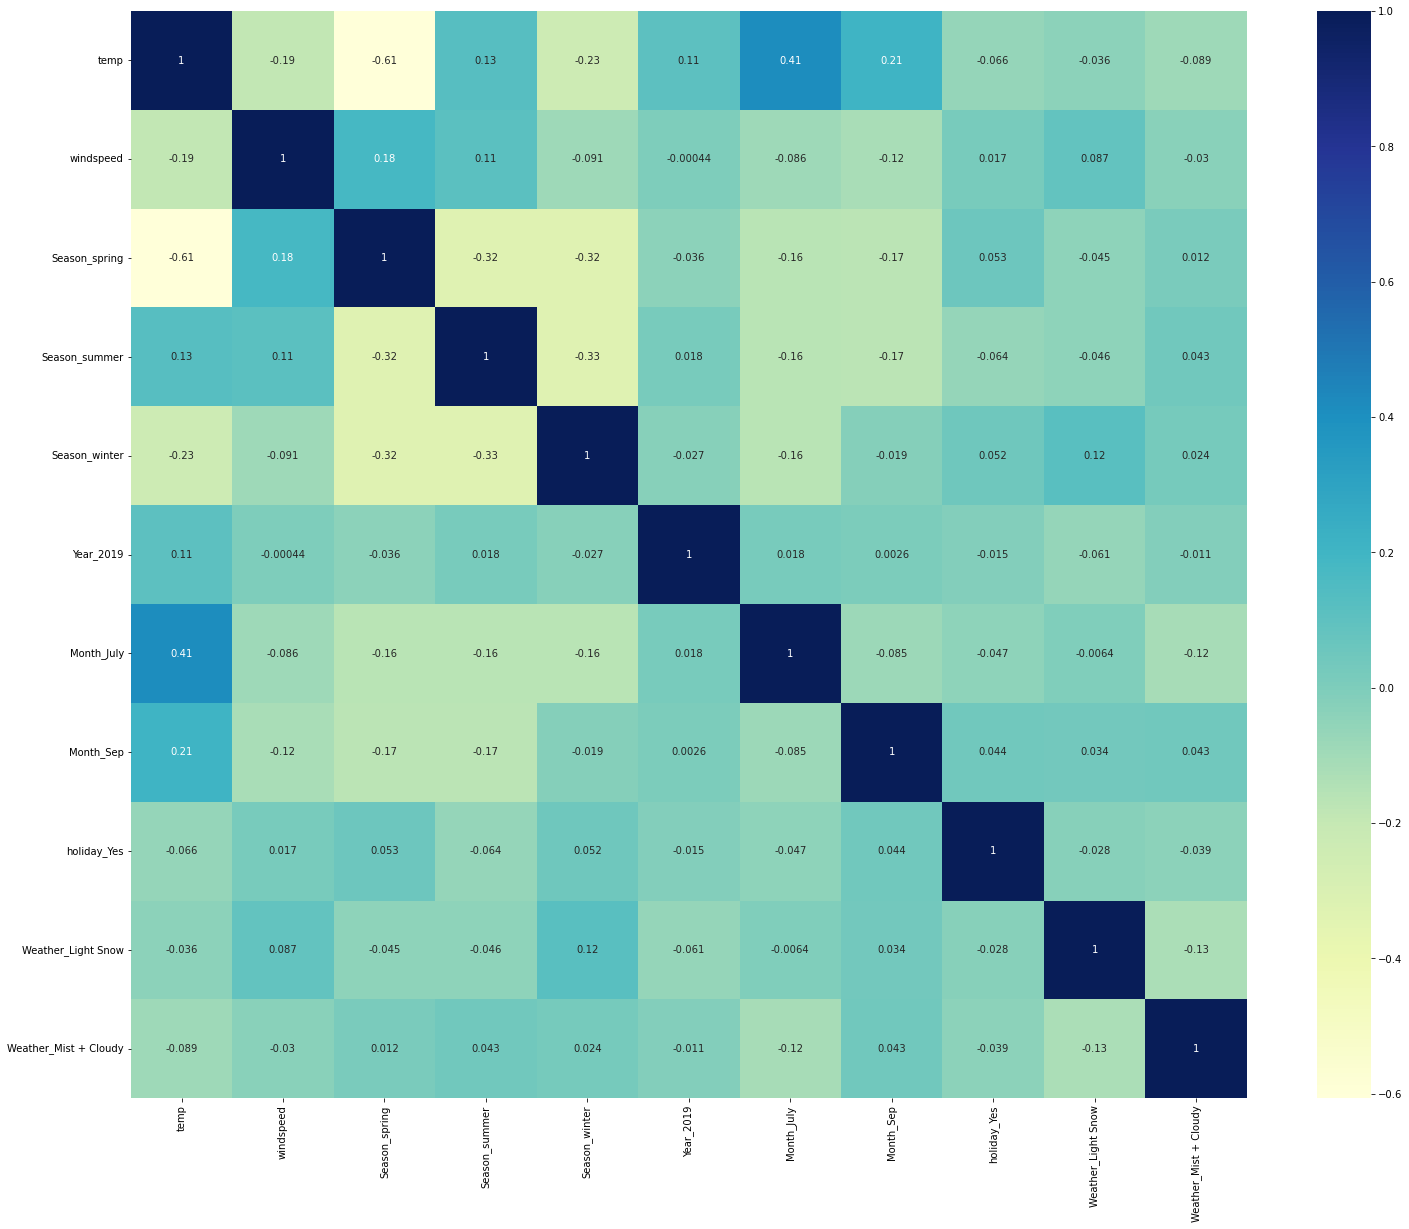

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(X_train_rfe5.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

## Model-6
### removing feature - 'Month_July' coz of high collinearity with temp variable.


In [ ]:
X_train_rfe6 = X_train_rfe5.drop('Month_July', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        22:10:18   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1909      0.030      6.447      0.000       0.133       0.249
temp                      0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Season_spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
Season_summer             0.0621      0.014      4.350      0.000       0.034       0.090
Season_winter             0.0945      0.017      5.630      0.000       0.062       0.127
Year_2019                 0.2341      0.008     28.237      0.000       0.218       0.250
Month_Sep                 0.0910      0.016      5.566      0.000       0.059       0.123
holiday_Yes              -0.0963      0.026     -3.668      0.000      -0.148      -0.045
Weather_Light Snow       -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Weather_Mist + Cloudy    -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.60
0,temp,3.84
5,Year_2019,2.07
2,Season_spring,1.99
3,Season_summer,1.90
4,Season_winter,1.63
9,Weather_Mist + Cloudy,1.55
6,Month_Sep,1.23
8,Weather_Light Snow,1.08
7,holiday_Yes,1.04


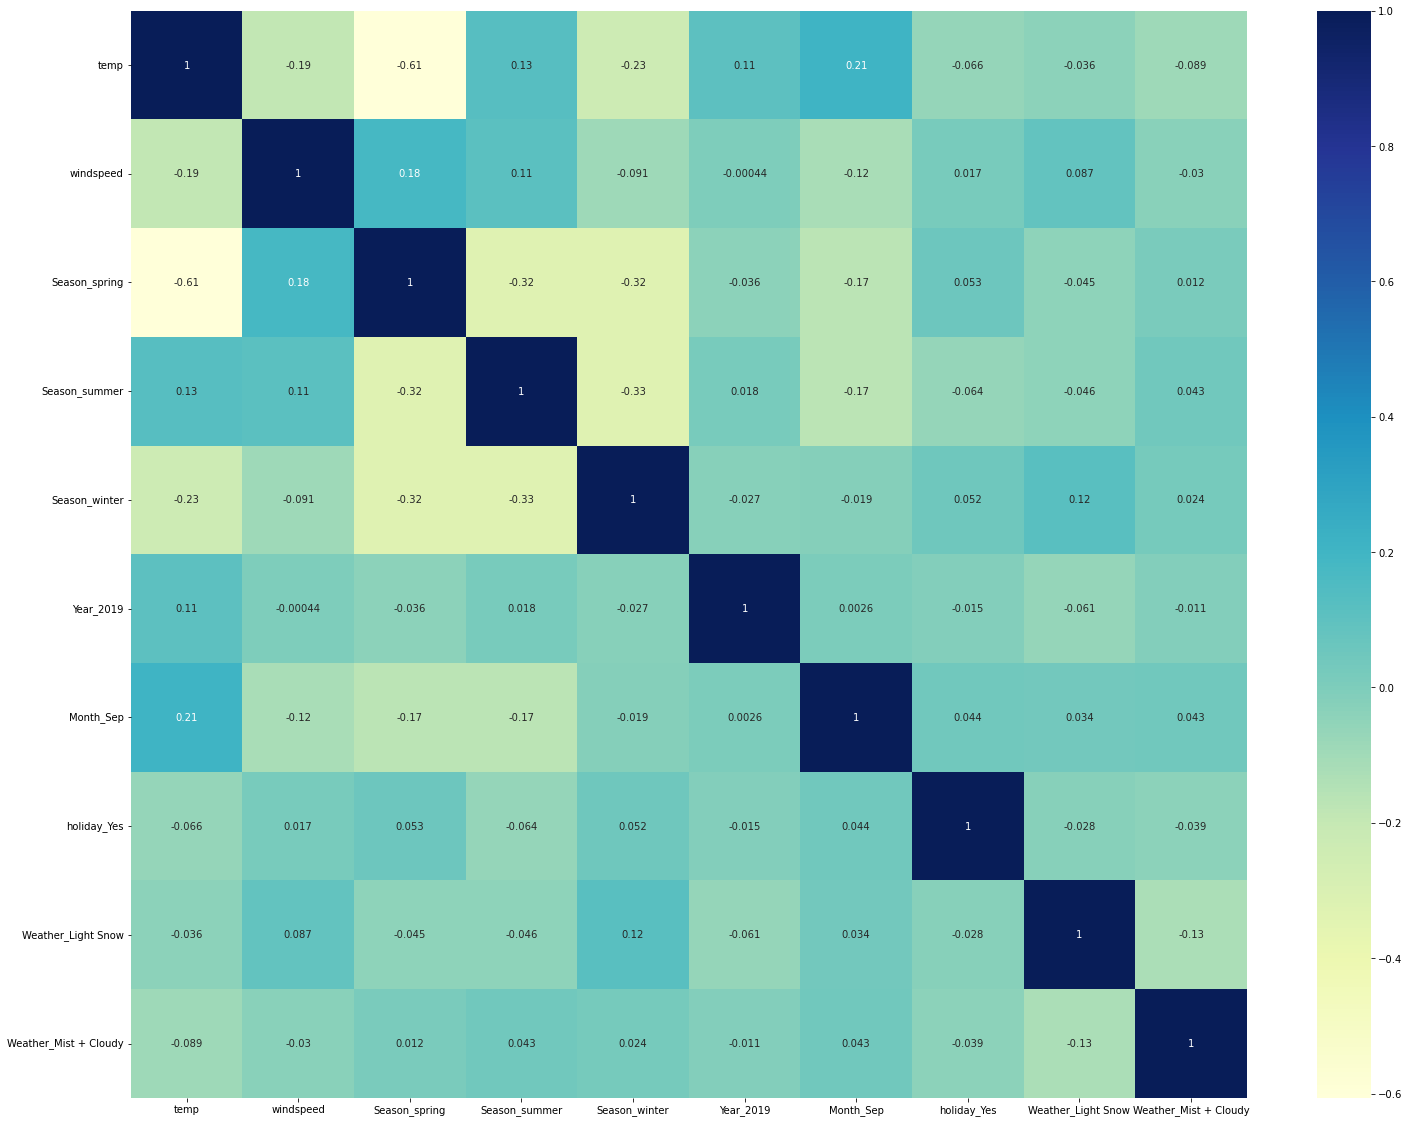

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(X_train_rfe6.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

## Model-7
### removing feature - 'Season_spring' coz of high negative collinearity with temp variable.



In [ ]:
X_train_rfe7 = X_train_rfe6.drop('Season_spring', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          2.83e-186
Time:                        22:10:18   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1259      0.017      7.508      0.000       0.093       0.159
temp                      0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                -0.1532      0.025     -6.039      0.000      -0.203      -0.103
Season_summer             0.0881      0.010      8.437      0.000       0.068       0.109
Season_winter             0.1293      0.011     12.314      0.000       0.109       0.150
Year_2019                 0.2329      0.008     27.962      0.000       0.216       0.249
Month_Sep                 0.1012      0.016      6.330      0.000       0.070       0.133
holiday_Yes              -0.0987      0.026     -3.738      0.000      -0.151      -0.047
Weather_Light Snow       -0.2829      0.025    -11.295      0.000      -0.332      -0.234
Weather_Mist + Cloudy    -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
# now we need to create dataframe to have all the variables together for feature selection then will find out respective VIFs.

vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.06
4,Year_2019,2.00
2,Season_summer,1.57
8,Weather_Mist + Cloudy,1.48
3,Season_winter,1.37
5,Month_Sep,1.20
7,Weather_Light Snow,1.08
6,holiday_Yes,1.04


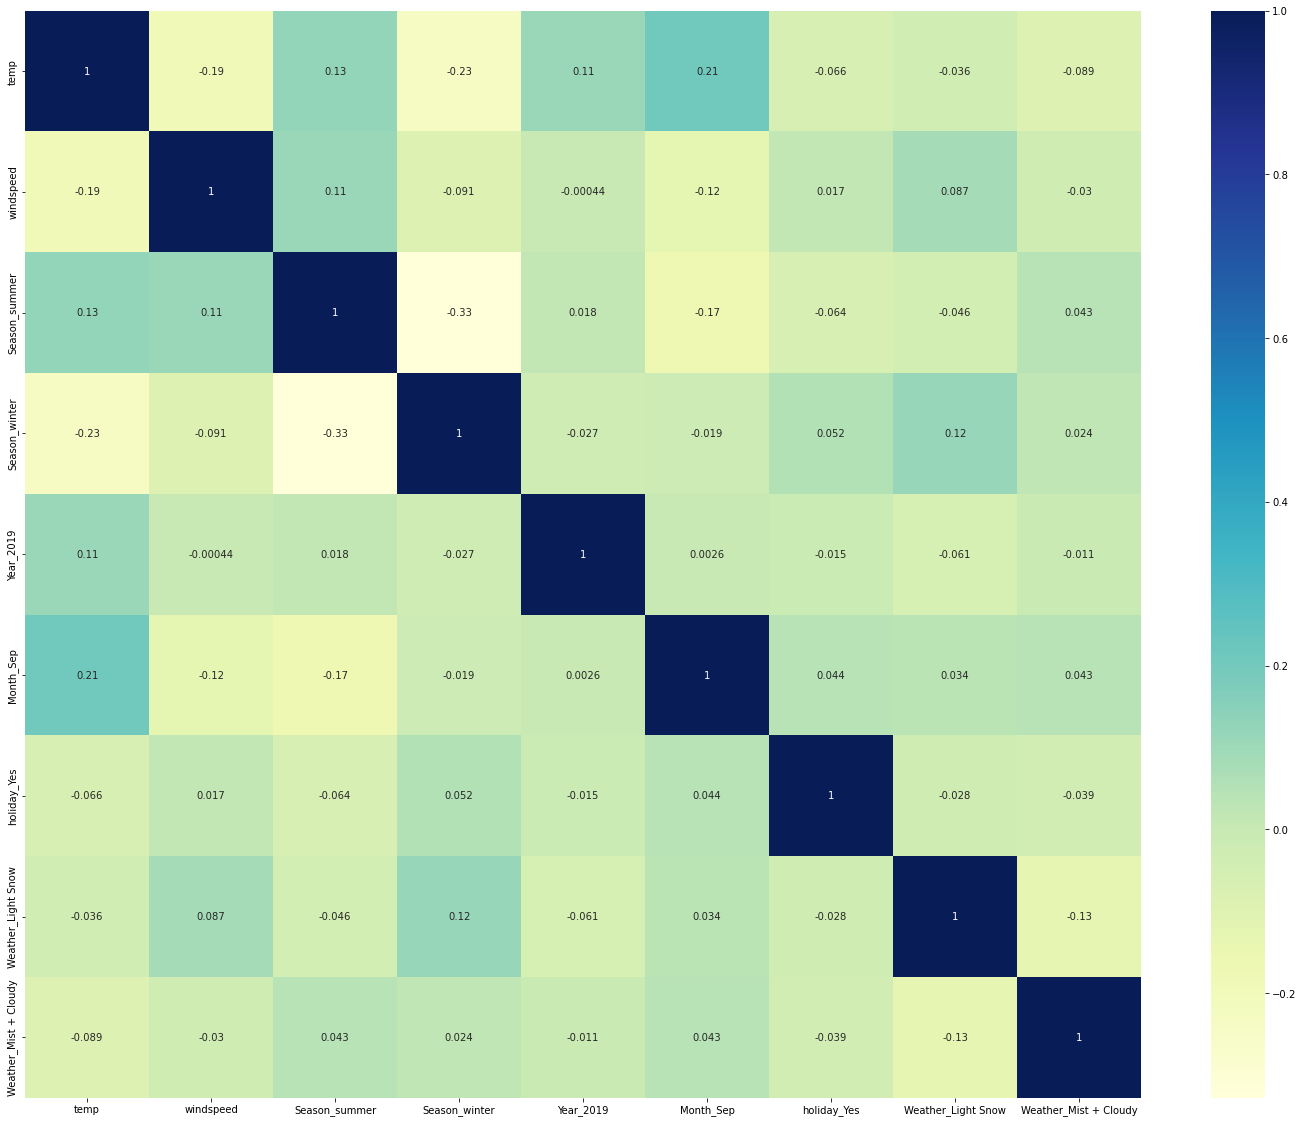

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(X_train_rfe7.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

#### According to my observation, this model seems to be really good as it has very low multicollinearity between predictors and p-values are seem to be really significant as all are 0.00. So we can conclude that this can be out final model for regresssion.

#### Final Model Interpretation

#### Model 7 coefficient values

const = 0.1259

temp = 0.5480

windspeed = -0.1532

Season_summer = 0.0881

Season_winter = 0.1293

Year_2019 = 0.2329

Month_Sept = 0.1012

holiday_Yes = -0.0987

Weather_Light Snow = -0.2829

Weather_Mist + Cloudy = -0.0784

# The equation for best fitted line based on Model 8:
# count = (const * 0.1259) + (temp * 0.5480) + (windspeed * -0.1532) + (Season_summer *  0.0881) + (Season_winter * 0.1293) + (Year_2019 * 0.2329) + (Month_Sept * 0.1012) + ( holiday_Yes * -0.0987) + (Weather_Light Snow * -0.2829) + ((Weather_Mist + Cloudy) * -0.0784)

#### In the model -7 we can observe that all the coefficients are significant as they are not equal to 0 hence we can reject the null hypothesis.

F Statistics : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.


F-statistic: 271.9(coming from our model)

Prob (F-statistic): 2.83e-186(coming from our model)

The F-Statistics value of 271.9 (which is greater than 1)

# Step- 6-> Residual Analysis of the train data

We need to check whether error terms are normally distributed with mean zero.



In [ ]:
#Residual Analysis Of Training Data
y_train_pred = lr7.predict(X_train_lm7)


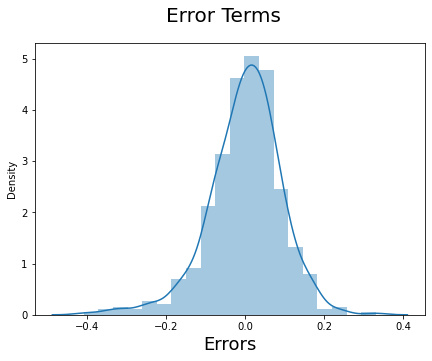

In [ ]:
# Here are the residual calculations
res = y_train - y_train_pred

# We are plotting the histogram of the error terms as below

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Insight-
AS we can see in the above histogram, residuals are noramlly distributed as there is no other peak other that one that we can see, so assumptions are pretty valid here.

### Check for Homoscedasticity


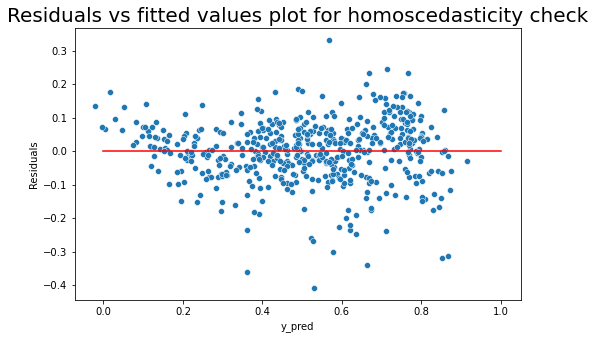

In [ ]:

plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred')
plt.ylabel('Residuals')
# now lets put a check for Homoscedasticity.
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Insight Below: -

It is mentioned in the above plot that residuals have almost equal variance over regression line.


# Step- 7-> Making Predictions

### MAKING PREDICTION USING FINAL MODEL as model-7
We have come to a conclusion that our model-7 would be appropriate so now its time to make predictions.



#### Applying the scaling on the test sets

We will only use scaler.transform, as we want to use the metrics that model learned from the training data to be applied on the test data.

In [ ]:
# We need to scale the dataset for as test set.
df_test_bike_new[num_vars] = scaler.transform(df_test_bike_new[num_vars])
df_test_bike_new.head()


,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Showing data columns after scalling.
df_test_bike_new.describe()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.036364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.640909,0.027273,0.318182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.187620,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.480828,0.163248,0.466833
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# For testing purpose we need to divide dataset into X and y test.

y_test = df_test_bike_new.pop('Count')
X_test = df_test_bike_new

print(y_test.shape)#printing shape
print(X_test.shape)

(220,)
(220, 29)


In [ ]:
#Here we are selecting model -7 columns/variables as below.
col_test = X_train_rfe7.columns

X_test = X_test[col_test]

# We need to add constant to the test set as well.
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.head()


,const,temp,windspeed,Season_summer,Season_winter,Year_2019,Month_Sep,holiday_Yes,Weather_Light Snow,Weather_Mist + Cloudy
184,1.0,0.831783,0.084219,0,0,0,0,1,0,1
535,1.0,0.901354,0.153728,1,0,1,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0


In [ ]:
# Now lets make prediction on the basis of our final model-7.
y_test_pred = lr7.predict(X_test_lm7)

# Step- 8-> Model Evaluation


Text(0, 0.5, 'y_test_pred')

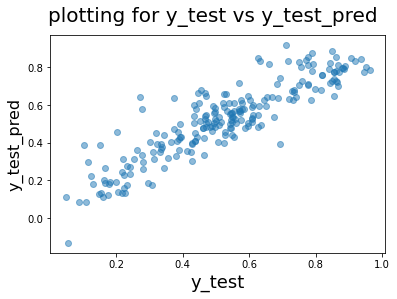

In [ ]:
# Lets plot y_test and y_test_pred to understand how the values are spread over the model.

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('plotting for y_test vs y_test_pred', fontsize = 20)# Giving heading to the model
plt.xlabel('y_test', fontsize = 18)  # giving label for X. and taking y_test on x axis.
plt.ylabel('y_test_pred', fontsize = 16) # y_test_pred on y axis.

### Here y_test and y_test_pred clearly showing linear relationship .


## Residual Analysis for Train set on model number -7 that we have finalised.


In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))


Test data r^2 : 79.42
Train data r^2 : 83.03


## Adjusted R^2 Value for TEST

Adjr2 = 1−(1−R2)∗(n−1)/(n−p−1)


In [ ]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe7.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 78.54
Train data adjusted r^2 : 82.73


# ANALYSIS ON FINAL RESULT:
Test data r^2 : 79.42

Train data r^2 : 83.03

Test data adjusted r^2 : 78.54

Train data adjusted r^2 : 82.73

The model seems to be best to generalize our prediction on the basis of above coefficients.

### Interpretation of Coefficients:

const: The Constant value of ‘0.1259’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.1259 units.

temp: A coefficient value of ‘0.5480’ indicate a unit increase in temp variable, increases the bike demand by 0.5480 units.

windspeed: A coefficient value of ‘-0.1532’ indicate a unit decrease in windspeed variable, decreases bike demand by 0.1532 units.

Season_summer: A coefficient value of ‘0.0881’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0881 units.

Season_winter: A coefficient value of ‘0.1293’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1293 units.

𝑌𝑒𝑎𝑟_2019: A coefficient value of ‘0.2329’ indicate a unit increase in Year_2019 variable, increases the bike demand by 0.2329 units.

Month_sept: A coefficient value of ‘0.1012’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.1012 units.

Holiday_Yes: A coefficient value of ‘-0.0987’ indicate a unit decrease in holiday_Yes variable, decreases bike demand by 0.0987 units.

Weather_Light Snow: A coefficient value of ‘-0.2829’ indicate a unit increase if the weather is good, decreases the bike demand by 0.0939 units.

Weather_Mist + Cloudy: A coefficient value of ‘-0.0784’ indicate a unit increase if the weather is good, decreases the bike demand by 0.0784 units.


# Final conclusion as follows-
- As seen, Temperature could be the first most and prime factor to make any decision for organisation.
- As seen we can say that, there are more bike rentals taken on weekdays so it could also be a contributer in decision making.
- As seen above, There was great demand of bike rentals in 2019 as compared to 2018.
- We also see there are some variables with negative coefficients(Holiday_Yes,windspeed, mist cloudy , light snow). A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
